In [4]:
import pyart
import statsmodels.api as sm

import netCDF4
import numpy as np
import platform
from matplotlib import pyplot as plt, rc
from glob import glob
import os
from datetime import datetime, timedelta
from scipy import interpolate, stats
import fnmatch
import matplotlib.dates as mdates
import pickle
from matplotlib.colors import LogNorm
#import pydisdrometer

%matplotlib inline

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 09:36:50.181882. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [5]:
my_system = platform.system()
if my_system == 'Darwin':
    top = '/data/interpsonde/'
    s_dir = '/data/interpsonde/'
    d_dir = '/data/egu17/'
    odir_r = '/data/egu17/radars/'
    odir_s = '/data/egu17/stats/'
    odir_i = '/data/egu17/images/'
    p_dir = '/data/egu17/pars/'
elif my_system == 'Linux':
    top = '/lcrc/group/earthscience/radar/sgpstage/sur/'
    s_dir = '/lcrc/group/earthscience/radar/sgpstage/interp_sonde/'
    odir_r = '/lcrc/group/earthscience/radar/agu2016/radars/'
    odir_s = '/lcrc/group/earthscience/radar/agu2016/stats/'
    odir_i = '/lcrc/group/earthscience/radar/agu2016/images/'

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 09:38:10.424793. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
def get_file_tree(start_dir, pattern):
    """
    Make a list of all files matching pattern
    above start_dir

    Parameters
    ----------
    start_dir : string
        base_directory

    pattern : string
        pattern to match. Use * for wildcard

    Returns
    -------
    files : list
        list of strings
    """

    files = []

    for dir, _, _ in os.walk(start_dir):
        files.extend(glob(os.path.join(dir, pattern)))
    return files

def read_dis(dfile):
    fh = open(dfile)
    line = fh.readline()
    fh.close()
    return line

def masked_conv(string, bad_val = -9999.):
    try:
        out = float(string)
    except:
        out = bad_val
    
    return out


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 09:45:25.998501. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [8]:
with open("/data/egu17/twpice_raindata_xcs.p", 'rb') as f:
    d = pickle.load(f, encoding='latin1') 

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 09:41:44.963780. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


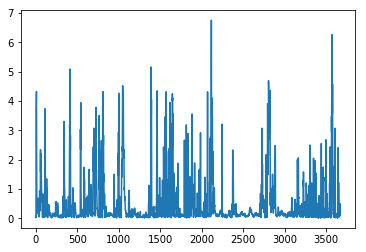

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 09:43:47.218695. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [10]:
plt.plot(d['lwcc'])

In [23]:
all_rd_files = get_file_tree(odir_s, 'csapr_distro*')
all_rd_files.sort()
form = 'csapr_distro_%Y%m%d%H%M%S.txt'
radar_dis_date_list = [datetime.strptime(this_date.split('/')[-1], form) for this_date in all_rd_files]
all_lines = [read_dis(tfile) for tfile in all_rd_files]

ad_form = '%Y%m%d%H%M%S'
actual_dates = np.array([datetime.strptime(this_line.split()[0], ad_form) for this_line in all_lines])


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 09:59:04.924259. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [79]:
split_peas = []
dat_locs = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34, 36,38, 40, 42]
lab_locs = [this -1 for this in dat_locs]
for i in range(len(all_lines)):
    split_pea = all_lines[i].split()
    labs = np.array(split_pea)[np.array(lab_locs)]
    datas = np.array(split_pea)[np.array(dat_locs)]
    args = labs.argsort()
    olabs = labs[args]
    odatas = datas[args]
    strr = split_pea[0]
    for j in range(len(odatas)):
        strr += ' '
        strr += olabs[j]
        strr += ' '
        strr += odatas[j]
    split_peas.append(strr)
distrometric_history = {}
for i in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34, 36,38, 40, 42]:
    print(i, split_peas[10].split()[i-1])
    this_key = split_peas[10].split()[i-1]
    these_values = np.ma.masked_equal(\
                                      np.array([masked_conv(this_line.split()[i])\
                                      for this_line in split_peas]), -9999.0)
    distrometric_history.update({this_key : these_values})

distrometric_history.update({'radar_start':radar_dis_date_list,
                            'overpass_time':actual_dates})
print(len(actual_dates))    
    
    
    

2 SNR
4 bringi_differential_phase
6 bringi_specific_diff_phase
8 bringi_specific_diff_phase_sd
10 corrected_differential_phase
12 corrected_specific_diff_phase
14 cross_correlation_ratio
16 differential_phase
18 differential_reflectivity
20 gate_id
22 height
24 maesaka__reverse_specific_diff_phase
26 maesaka_differential_phase
28 maesaka_forward_specific_diff_phase
30 normalized_coherent_power
32 reflectivity
34 sounding_temperature
36 spectrum_width
38 unfolded_differential_phase
40 velocity
42 velocity_texture
7017


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 13:50:47.972692. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [78]:
print(split_peas[0])

20051201000031 SNR 32.9382202424 bringi_differential_phase -- bringi_specific_diff_phase -- bringi_specific_diff_phase_sd 54.7859 corrected_differential_phase -0.0451424048552 corrected_specific_diff_phase 0.0737690743953 cross_correlation_ratio 0.7 differential_phase 30.5 differential_reflectivity -6.094 gate_id 3 height 285.153632237 maesaka__reverse_specific_diff_phase -- maesaka_differential_phase -- maesaka_forward_specific_diff_phase -- normalized_coherent_power 1.0 reflectivity 22.0 sounding_temperature 26.3042742481 spectrum_width 2.56 unfolded_differential_phase 0.0 velocity -5.78 velocity_texture 7.61361


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 13:49:54.425283. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


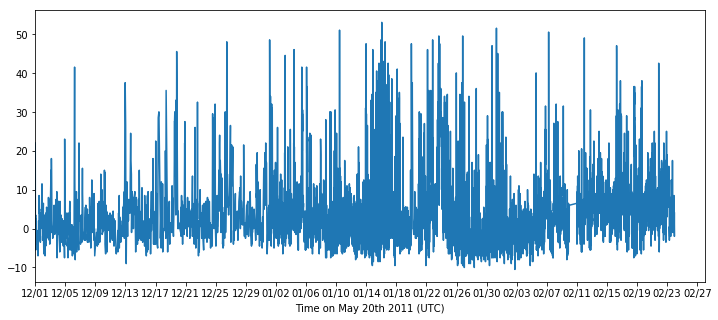

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 13:50:54.404529. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [80]:
time1=mdates.datestr2num('20051201 0000')
time2=mdates.datestr2num('20060227 2359')

hours = mdates.HourLocator()
days = mdates.DayLocator(interval = 4)
tFmt = mdates.DateFormatter('%m/%d')
f = plt.figure(figsize=[12,5])
plt.plot(mdates.date2num(distrometric_history['radar_start']),
         distrometric_history['reflectivity'])
ax = plt.gca()
#plt.ylabel('Drop volume Density $\mathrm{(m^{-3})}$')
ax.xaxis_date()
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(tFmt)
ax.set_xlim([time1, time2])
plt.xlabel('Time on May 20th 2011 (UTC)')

In [22]:
print(all_lines[15])

20051201121233 differential_reflectivity -6.236 sounding_temperature 26.2780472495 bringi_specific_diff_phase -- reflectivity 8.5 differential_phase 120.5 spectrum_width 4.96 maesaka_forward_specific_diff_phase 72.8326969479 corrected_specific_diff_phase 0.0785113125982 unfolded_differential_phase 0.0 SNR 19.5648207016 velocity_texture 7.69621 cross_correlation_ratio 0.11 maesaka__reverse_specific_diff_phase 72.78479695 bringi_differential_phase -- gate_id 0 velocity -7.57 bringi_specific_diff_phase_sd 40.3223 normalized_coherent_power 1.0 corrected_differential_phase -0.0414526476834 height 285.153632237 maesaka_differential_phase 0.000166666659216 


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-20 09:53:39.116655. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
